# Proj-housing-insecurity
## Research Question 3 (ACS): What are the differences between the 2014 and 2019 5-year American Community Survey datasets? Which variables or labels are missing from the 2014 data but in the 2019 data, and vice versa? Which 2019 variables have changed significantly from the 2014 estimates?

In [1]:
# import libraries

# dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# display entire dataframe
pd.options.display.max_rows = 400000
pd.options.display.max_columns = 500
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-07c1b85088d3>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
# read csv file for both 2014 and 2019, data dictionary
dict_acs = pd.read_csv('../datasets/acs5_variable_dict_2014_2019.csv')
acs_2014_hb = pd.read_csv('../datasets/hillsborough_acs5-2014_census.csv')
acs_2019_hb = pd.read_csv('../datasets/hillsborough_acs5-2019_census.csv')

### Task 1: Using the ACS data dictionary found here, compare variables from 2014 with variables from 2019. Do the variable codes and labels remain consistent across ACS versions? For example, does DP_002E in 2014 and DP_002E in 2019 refer to the same information? (Note that you can attempt this task using any county's ACS datasets - we know for certain that (e.g.) 2014 Hillsborough County and 2014 Miami-Dade County variables are consistent with each other.)

In [3]:
# inspect dictionary
dict_acs.head()

variable_code  \
0  DP02_0019EA    
1  DP02_0126E     
2  DP02_0072EA    
3  DP02_0069PMA   
4  DP02_0126M     

                                                                                                             label  \
0  Annotation of Estimate!!RELATIONSHIP!!Population in households!!Spouse                                            
1  Estimate!!ANCESTRY!!Total population!!Danish                                                                      
2  Annotation of Estimate!!DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION!!Under 18 years         
3  Annotation of Percent Margin of Error!!VETERAN STATUS!!Civilian population 18 years and over!!Civilian veterans   
4  Margin of Error!!ANCESTRY!!Total population!!Danish                                                               

                                                concept predicateType group  \
0  SELECTED SOCIAL CHARACTERISTICS IN THE UNITED STATES  string        DP02   
1  SELECTED SOCIAL CHARACTERISTICS IN THE UNITED STATES  int           DP02   
2  SELECTED SOCIAL CHARACTERISTICS IN THE UNITED STATES  string        DP02   
3  SELECTED SOCIAL CHARACTERISTICS IN THE UNITED STATES  string        DP02   
4  SELECTED SOCIAL CHARACTERISTICS IN THE UNITED STATES  int           DP02   

   limit  predicateOnly  acs_year  
0  0      True           2014      
1  0      True           2014      
2  0      True           2014      
3  0      True           2014      
4  0      True           2014

In [4]:
# unique variable codes
uniq_vc = dict_acs.groupby('variable_code').filter(lambda x: len(x) == 1).sort_values('variable_code', ascending=True)
uniq_vc

variable_code  \
5114  DP02_0153E     
4831  DP02_0153EA    
5109  DP02_0153M     
4871  DP02_0153MA    
4880  DP02_0153PE    
4570  DP02_0153PEA   
4883  DP02_0153PM    
4601  DP02_0153PMA   
7431  DP04_0142E     
6576  DP04_0142EA    
7430  DP04_0142M     
6616  DP04_0142MA    
6626  DP04_0142PE    
7203  DP04_0142PEA   
6625  DP04_0142PM    
7238  DP04_0142PMA   
7407  DP04_0143E     
6670  DP04_0143EA    
7405  DP04_0143M     
6711  DP04_0143MA    
6733  DP04_0143PE    
6491  DP04_0143PEA   
6729  DP04_0143PM    
6521  DP04_0143PMA   
7818  DP05_0082E     
7635  DP05_0082EA    
7824  DP05_0082M     
7641  DP05_0082MA    
7649  DP05_0082PE    
7923  DP05_0082PEA   
7647  DP05_0082PM    
7924  DP05_0082PMA   
7820  DP05_0083E     
7717  DP05_0083EA    
7795  DP05_0083M     
8089  DP05_0083MA    
8096  DP05_0083PE    
8176  DP05_0083PEA   
8094  DP05_0083PM    
8162  DP05_0083PMA   
7794  DP05_0084E     
8163  DP05_0084EA    
7800  DP05_0084M     
8172  DP05_0084MA    
8182  DP05_0084PE    
7739  DP05_0084PEA   
8180  DP05_0084PM    
7720  DP05_0084PMA   
7797  DP05_0085E     
8240  DP05_0085EA    
7804  DP05_0085M     
8256  DP05_0085MA    
7918  DP05_0085PE    
7984  DP05_0085PEA   
7917  DP05_0085PM    
7956  DP05_0085PMA   
7802  DP05_0086E     
7966  DP05_0086EA    
7811  DP05_0086M     
7993  DP05_0086MA    
7997  DP05_0086PE    
8263  DP05_0086PEA   
7996  DP05_0086PM    
8210  DP05_0086PMA   
7807  DP05_0087E     
8039  DP05_0087EA    
7781  DP05_0087M     
8072  DP05_0087MA    
8077  DP05_0087PE    
7816  DP05_0087PEA   
8076  DP05_0087PM    
7786  DP05_0087PMA   
7780  DP05_0088E     
7776  DP05_0088EA    
7779  DP05_0088M     
7801  DP05_0088MA    
7806  DP05_0088PE    
8036  DP05_0088PEA   
7803  DP05_0088PM    
8019  DP05_0088PMA   
7783  DP05_0089E     
7870  DP05_0089EA    
7782  DP05_0089M     
7897  DP05_0089MA    
7899  DP05_0089PE    
7621  DP05_0089PEA   
7898  DP05_0089PM    
7596  DP05_0089PMA   

                                                                                                                                                                                                 label  \
5114  Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription                                                                                                     
4831  Annotation of Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription                                                                                       
5109  Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription                                                                                              
4871  Annotation of Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription                                                                                
4880  Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription                                                                                                      
4570  Annotation of Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription                                                                                        
4883  Percent Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription                                                                                      
4601  Annotation of Percent Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription                                                                        
7431  Estimate!!GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI)!!Occupied units paying rent (excluding units where GRAPI cannot be computed)!!35.0 percent or more                                
6576  Annotation of Estima

In [5]:
# number of excess variable code
len(uniq_vc)

88

In [6]:
# labels that needs to be clean
dict_needs_clean = dict_acs.groupby('label').filter(lambda x: len(x) == 1).sort_values('label', ascending=True)

In [7]:
dict_needs_clean

variable_code  \
8039  DP05_0087EA    
7870  DP05_0089EA    
7776  DP05_0088EA    
2141  DP03_0025EA    
6237  DP03_0025EA    
1482  DP03_0024EA    
5578  DP03_0024EA    
290   DP02_0150EA    
610   DP02_0152EA    
437   DP02_0151EA    
4525  DP02_0151EA    
4831  DP02_0153EA    
4700  DP02_0152EA    
1155  DP02_0067EA    
1038  DP02_0066EA    
4180  DP02_0068EA    
5251  DP02_0067EA    
1844  DP03_0009EA    
5940  DP03_0009EA    
1591  DP03_0016EA    
1712  DP03_0017EA    
5687  DP03_0016EA    
5807  DP03_0017EA    
5998  DP03_0014EA    
6089  DP03_0015EA    
1902  DP03_0014EA    
1993  DP03_0015EA    
4629  DP02_0045EA    
415   DP02_0044EA    
2338  DP04_0141EA    
6670  DP04_0143EA    
3036  DP04_0133EA    
2756  DP04_0131EA    
6697  DP04_0130EA    
6861  DP04_0131EA    
6971  DP04_0132EA    
2660  DP04_0126EA    
7142  DP04_0133EA    
2818  DP04_0127EA    
2951  DP04_0128EA    
7057  DP04_0128EA    
3097  DP04_0129EA    
2547  DP04_0125EA    
6924  DP04_0127EA    
7395  DP04_0135EA    
2263  DP03_0102EA    
1891  DP03_0103EA    
1973  DP03_0104EA    
1365  DP03_0108EA    
1539  DP03_0105EA    
1725  DP03_0106EA    
1261  DP03_0107EA    
2065  DP03_0109EA    
1460  DP03_0113EA    
1646  DP03_0110EA    
1747  DP03_0111EA    
1284  DP03_0112EA    
2140  DP03_0114EA    
1562  DP03_0118EA    
2221  DP03_0115EA    
1838  DP03_0116EA    
1990  DP03_0117EA    
6359  DP03_0102EA    
5987  DP03_0103EA    
6069  DP03_0104EA    
5461  DP03_0108EA    
5635  DP03_0105EA    
5821  DP03_0106EA    
5357  DP03_0107EA    
6160  DP03_0109EA    
5556  DP03_0113EA    
5742  DP03_0110EA    
5843  DP03_0111EA    
5380  DP03_0112EA    
6236  DP03_0114EA    
5658  DP03_0118EA    
6317  DP03_0115EA    
5934  DP03_0116EA    
6086  DP03_0117EA    
1437  DP03_0100EA    
2119  DP03_0101EA    
5533  DP03_0100EA    
6215  DP03_0101EA    
822   DP02_0016EA    
656   DP02_0015EA    
511   DP02_0014EA    
416   DP02_0013EA    
5057  DP02_0017EA    
4916  DP02_0016EA    
5073  DP02_0004EA    
5215  DP02_0005EA    
670   DP02_0002EA    
348   DP02_0008EA    
488   DP02_0009EA    
17    DP02_0006EA    
163   DP02_0007EA    
979   DP02_0004EA    
1119  DP02_0005EA    
804   DP02_0003EA    
5245  DP02_0010EA    
4351  DP02_0012EA    
4504  DP02_0013EA    
4172  DP02_0011EA    
4746  DP02_0015EA    
4600  DP02_0014EA    
4105  DP02_0006EA    
4436  DP02_0008EA    
4577  DP02_0009EA    
4251  DP02_0007EA    
4760  DP02_0002EA    
4898  DP02_0003EA    
1149  DP02_0010EA    
83    DP02_0011EA    
263   DP02_0012EA    
2429  DP04_0004EA    
2528  DP04_0005EA    
6528  DP04_0004EA    
6630  DP04_0005EA    
3426  DP04_0047EA    
2440  DP04_0048EA    
6538  DP04_0048EA    
6642  DP04_0049EA    
1832  DP03_0075EA    
1516  DP03_0077EA    
1731  DP03_0083EA    
1643  DP03_0078EA    
1247  DP03_0084EA    
1400  DP03_0085EA    
1804  DP03_0079EA    
1877  DP03_0080EA    
2012  DP03_0081EA    
1564  DP03_0082EA    
1937  DP03_0076EA    
2207  DP03_0087EA    
2084  DP03_0086EA    
1984  DP03_0094EA    
1849  DP03_0093EA    
2249  DP03_0092EA    
1950  DP03_0089EA    
2120  DP03_0091EA    
1459  DP03_0090EA    
1819  DP03_0088EA    
1526  DP03_0051EA    
1216  DP03_0053EA    
2016  DP03_0059EA    
1366  DP03_0054EA    
2114  DP03_0060EA    
2219  DP03_0061EA    
1487  DP03_0055EA    
2184  DP03_0056EA    
2278  DP03_0057EA    
1913  DP03_0058EA    
1694  DP03_0052EA    
1957  DP03_0063EA    
1845  DP03_0062EA    
2199  DP03_0074EA    
1224  DP03_0066EA    
1346  DP03_0067EA    
1715  DP03_0070EA    
1274  DP03_0071EA    
1386  DP03_0072EA    
2099  DP03_0073EA    
1536  DP03_0064EA    
1670  DP03_0065EA    
1505  DP03_0068EA    
2165  DP03_0069EA    
5928  DP03_0075EA    
5612  DP03_0077EA    
5827  DP03_0083EA    
5739  DP03_0078EA    
5343  DP03_0084EA    
5497  DP03_0085EA    
5900  DP03_0079EA    
5973  DP03_0080EA    
6108  DP03_0081EA    
5660  DP03_0082EA    
6033  DP03_0076EA    
6303  DP03_0087EA    
6180  DP03_0086EA    
6080  DP03_0094EA    
5945  DP03_0093EA    
6

In [8]:
len(dict_needs_clean)

3240

### Task 6: Using the filtered datasets created in task 4, compare 2014 and 2019 ACS data for Hillsborough County, FL. Which variables changed significantly? Which stayed more or less the same? Are any of these changes meaningful even after taking margins of error into account?

In [9]:
# display column names 2014 Hillsborough
acs_2014_hb.columns

Index(['index', 'DP02_0001E', 'DP02_0001PE', 'DP02_0002E', 'DP02_0002PE',
       'DP02_0003E', 'DP02_0003PE', 'DP02_0004E', 'DP02_0004PE', 'DP02_0005E',
       ...
       'B25087_027E', 'B25087_028E', 'B25087_029E', 'B25088_001E',
       'B25088_002E', 'B25088_003E', 'B25092_001E', 'B25092_002E',
       'B25092_003E', 'GEOID'],
      dtype='object', length=1555)

In [10]:
# display column names 2019 Hillsborough
acs_2019_hb.columns

Index(['index', 'DP02_0001E', 'DP02_0001PE', 'DP02_0002E', 'DP02_0002PE',
       'DP02_0003E', 'DP02_0003PE', 'DP02_0004E', 'DP02_0004PE', 'DP02_0005E',
       ...
       'B25087_037E', 'B25087_038E', 'B25087_039E', 'B25088_001E',
       'B25088_002E', 'B25088_003E', 'B25092_001E', 'B25092_002E',
       'B25092_003E', 'GEOID'],
      dtype='object', length=1613)

In [11]:
# display index for 2014 Hillsborough
acs_2014_hb[['index']].head()

index
0  Census Tract 111.03, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011103
1  Census Tract 114.08, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011408
2  Census Tract 114.13, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011413
3  Census Tract 116.08, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011608
4  Census Tract 116.11, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011611

In [12]:
# display index for 2019 Hillsborough
acs_2019_hb[['index']].head()

index
0  Census Tract 4.01, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:000401  
1  Census Tract 101.05, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:010105
2  Census Tract 102.03, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:010203
3  Census Tract 106, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:010600   
4  Census Tract 23, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:002300

In [13]:
acs_2014_hb.head()

index  \
0  Census Tract 111.03, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011103   
1  Census Tract 114.08, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011408   
2  Census Tract 114.13, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011413   
3  Census Tract 116.08, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011608   
4  Census Tract 116.11, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011611   

   DP02_0001E  DP02_0001PE  DP02_0002E  DP02_0002PE  DP02_0003E  DP02_0003PE  \
0  1268        1268         1012        79.8         374         29.5          
1  1078        1078         811         75.2         332         30.8          
2  2111        2111         1444        68.4         704         33.3          
3  428         428          319         74.5         146         34.1          
4  1596        1596         990         62.0         438         27.4          

   DP02_0004E  DP02_0004PE  DP02_0005E  DP02_0005PE  DP02_0006E  DP02_0006PE  \
0  826         65.1         302         23.8         105         8.3           
1  692         64.2         288         26.7         36          3.3           
2  1012        47.9         465         22.0         131         6.2           
3  272         63.6         110         25.7         6           1.4           
4  609         38.2         241         15.1         80          5.0           

   DP02_0007E  DP02_0007PE  DP02_0008E  DP02_0008PE  DP02_0009E  DP02_0009PE  \
0  43          3.4          81          6.4          29          2.3           
1  27          2.5          83          7.7          17          1.6           
2  109         5.2          301         14.3         130         6.2           
3  4           0.9          41          9.6          32          7.5           
4  44          2.8          301         18.9         153         9.6           

   DP02_0010E  DP02_0010PE  DP02_0011E  DP02_0011PE  DP02_0012E  DP02_0012PE  \
0  256         20.2         193         15.2         110         8.7           
1  267         24.8         212         19.7         22          2.0           
2  667         31.6         592         28.0         193         9.1           
3  109         25.5         84          19.6         26          6.1           
4  606         38.0         453         28.4         77          4.8           

   DP02_0013E  DP02_0013PE  DP02_0014E  DP02_0014PE  DP02_0015E  DP02_0015PE  \
0  412         32.5         373         29.4         2.86       -888888888     
1  430         39.9         186         17.3         2.85       -888888888     
2  718         34.0         476         22.5         2.84       -888888888     
3  160         37.4         77          18.0         2.77       -888888888     
4  494         31.0         363         22.7         2.59       -888888888     

   DP02_0016E  DP02_0016PE  DP02_0017E  DP02_0017PE  DP02_0018E  DP02_0018PE  \
0  3.22       -888888888    3630        3630         1268        34.9          
1  3.35       -888888888    3067        3067         1078        35.1          
2  3.59       -888888888    5997        5997         2111        35.2          
3  3.26       -888888888    1187        1187         428         36.1          
4  3.10       -888888888    4136        4136         1596        38.6          

   DP02_0019E  DP02_0019PE  DP02_0020E  DP02_0020PE  DP02_0021E  DP02_0021PE  \
0  820         22.6         1103        30.4         326         9.0           
1  688         22.4         857         27.9         360         11.7          
2  1012        16.9         2019        33.7         713         11.9          
3  272         22.9         342         28.8         107         9.0           
4  597         14.4         1267        30.6         217         5.2           

   DP02_0022E  DP02_0022PE  DP02_0023E  DP02_0023PE  DP02_0024E

In [14]:
# merge 2014 and 2019 into 1 single df
acs_hb = pd.merge(acs_2014_hb, acs_2019_hb, on='index')

In [15]:
# display merge data
acs_hb.head()

index  \
0  Census Tract 111.03, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011103   
1  Census Tract 114.08, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011408   
2  Census Tract 114.13, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011413   
3  Census Tract 116.08, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011608   
4  Census Tract 116.11, Hillsborough County, Florida: Summary level: 140, state:12> county:057> tract:011611   

   DP02_0001E_x  DP02_0001PE_x  DP02_0002E_x  DP02_0002PE_x  DP02_0003E_x  \
0  1268          1268           1012          79.8           374            
1  1078          1078           811           75.2           332            
2  2111          2111           1444          68.4           704            
3  428           428            319           74.5           146            
4  1596          1596           990           62.0           438            

   DP02_0003PE_x  DP02_0004E_x  DP02_0004PE_x  DP02_0005E_x  DP02_0005PE_x  \
0  29.5           826           65.1           302           23.8            
1  30.8           692           64.2           288           26.7            
2  33.3           1012          47.9           465           22.0            
3  34.1           272           63.6           110           25.7            
4  27.4           609           38.2           241           15.1            

   DP02_0006E_x  DP02_0006PE_x  DP02_0007E_x  DP02_0007PE_x  DP02_0008E_x  \
0  105           8.3            43            3.4            81             
1  36            3.3            27            2.5            83             
2  131           6.2            109           5.2            301            
3  6             1.4            4             0.9            41             
4  80            5.0            44            2.8            301            

   DP02_0008PE_x  DP02_0009E_x  DP02_0009PE_x  DP02_0010E_x  DP02_0010PE_x  \
0  6.4            29            2.3            256           20.2            
1  7.7            17            1.6            267           24.8            
2  14.3           130           6.2            667           31.6            
3  9.6            32            7.5            109           25.5            
4  18.9           153           9.6            606           38.0            

   DP02_0011E_x  DP02_0011PE_x  DP02_0012E_x  DP02_0012PE_x  DP02_0013E_x  \
0  193           15.2           110           8.7            412            
1  212           19.7           22            2.0            430            
2  592           28.0           193           9.1            718            
3  84            19.6           26            6.1            160            
4  453           28.4           77            4.8            494            

   DP02_0013PE_x  DP02_0014E_x  DP02_0014PE_x  DP02_0015E_x  DP02_0015PE_x  \
0  32.5           373           29.4           2.86         -888888888       
1  39.9           186           17.3           2.85         -888888888       
2  34.0           476           22.5           2.84         -888888888       
3  37.4           77            18.0           2.77         -888888888       
4  31.0           363           22.7           2.59         -888888888       

   DP02_0016E_x  DP02_0016PE_x  DP02_0017E_x  DP02_0017PE_x  DP02_0018E_x  \
0  3.22         -888888888      3630          3630           1268           
1  3.35         -888888888      3067          3067           1078           
2  3.59         -888888888      5997          5997           2111           
3  3.26         -888888888      1187          1187           428            
4  3.10         -888888888      4136          4136           1596           

   DP02_0018PE_x  DP02_0019E_x  DP02_0019PE_x  DP02_0020E_x  DP02_0020PE_x  \
0  34.9           820           22.6           1103          30.4            
1  35.1        

In [16]:
# replace _x with _2014 and _y with 2019
acs_hb.columns = acs_hb.columns.str.replace('_x', '_2014')
acs_hb.columns = acs_hb.columns.str.replace('_y', '_2019')

In [17]:
# display suffix replaed
acs_hb.columns

Index(['index', 'DP02_0001E_2014', 'DP02_0001PE_2014', 'DP02_0002E_2014',
       'DP02_0002PE_2014', 'DP02_0003E_2014', 'DP02_0003PE_2014',
       'DP02_0004E_2014', 'DP02_0004PE_2014', 'DP02_0005E_2014',
       ...
       'B25087_037E', 'B25087_038E', 'B25087_039E', 'B25088_001E_2019',
       'B25088_002E_2019', 'B25088_003E_2019', 'B25092_001E_2019',
       'B25092_002E_2019', 'B25092_003E_2019', 'GEOID_2019'],
      dtype='object', length=3167)

In [35]:
# sort column names
acs_hb = acs_hb[sorted(acs_hb.columns)]

# If I have more time:
1. I will create a function to plot subplots of same variable code in pairs
2. t-test

<AxesSubplot:>

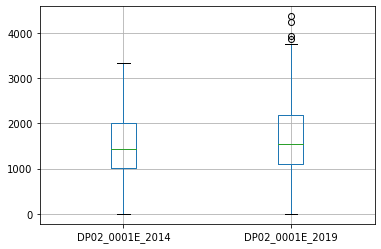

In [33]:
# plot DP02_0001E box plot for visual comparison
acs_hb.boxplot(column=['DP02_0001E_2014', 'DP02_0001E_2019'])

<AxesSubplot:>

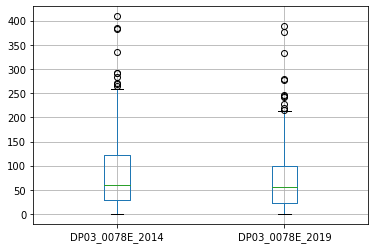

In [27]:
# plot DP03_0078E box plot for visual comparison
acs_hb.boxplot(column=['DP03_0078E_2014', 'DP03_0078E_2019'])

<AxesSubplot:>

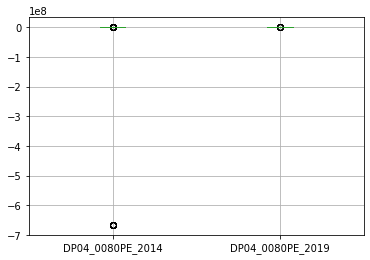

In [28]:
# plot DP04_0080PE box plot for visual comparison
acs_hb.boxplot(column=['DP04_0080PE_2014', 'DP04_0080PE_2019'])

<AxesSubplot:>

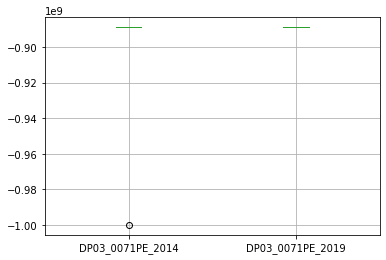

In [29]:
# plot DP03_0071PE box plot for visual comparison
acs_hb.boxplot(column=['DP03_0071PE_2014', 'DP03_0071PE_2019'])

<AxesSubplot:>

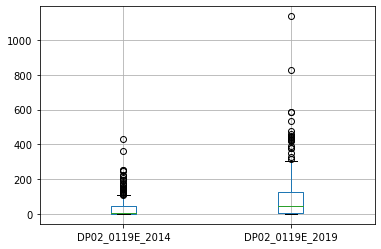

In [30]:
# plot DP02_0119E box plot for visual comparison
acs_hb.boxplot(column=['DP02_0119E_2014', 'DP02_0119E_2019'])